<a href="https://colab.research.google.com/github/XcLyBr/Sales-Forecast/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sns; sns.set_theme
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.dummy import DummyRegressor
from sklearn import set_config
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
set_config(display = "diagram")
sns.set()


In [ ]:
filename = '/content/drive/MyDrive/sales_predictions.csv'

In [ ]:
df = pd.read_csv(filename, index_col =0)
df.head(10)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [ ]:
df.shape

(8523, 11)

In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated().any()

False

No duplicates

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [ ]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace({'LF': 'Low Fat'}, inplace = True)
df.replace({'reg': 'Regular'}, inplace = True)
df.replace({'low fat': 'Low Fat'}, inplace = True)


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dropping Outlet Size will be more than 5% df


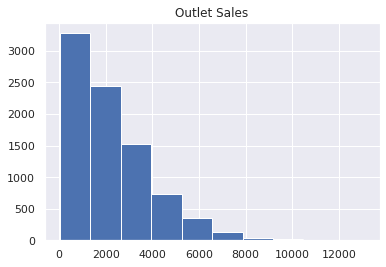

In [ ]:
df['Item_Outlet_Sales'].hist();
plt.title('Outlet Sales');

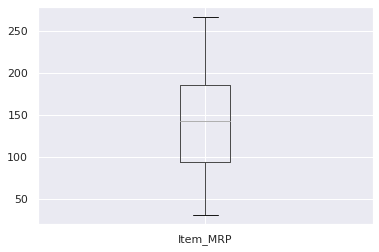

In [ ]:
df.boxplot('Item_MRP')

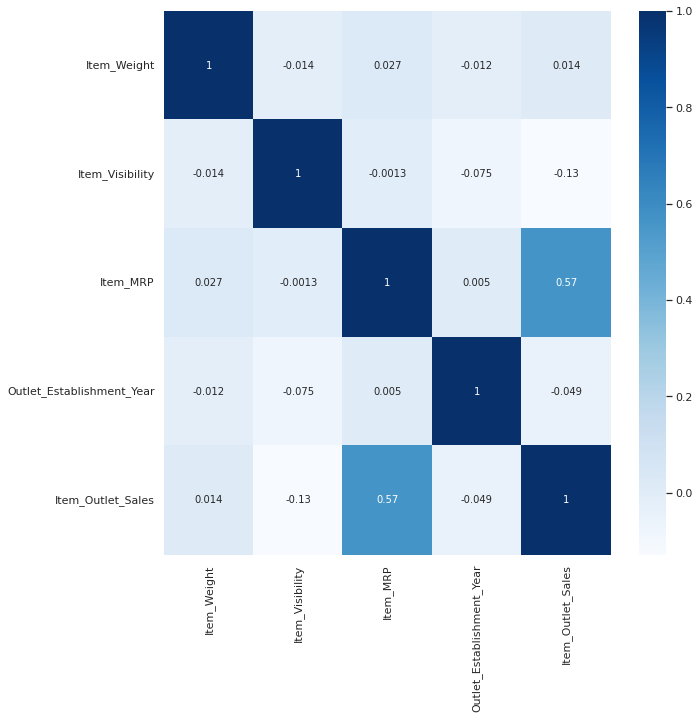

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', annot=True)

In [ ]:
OS = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
OS

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

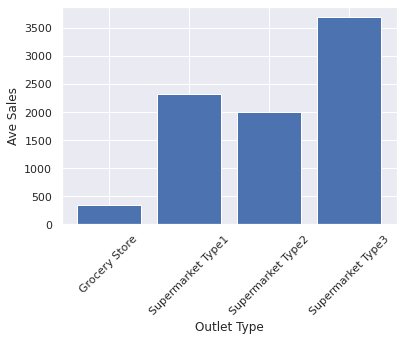

In [ ]:
# Average sales as per Outlet Type
plt.bar(OS.index, OS.values)
plt.ylabel('Ave Sales')
plt.xlabel('Outlet Type')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
IT = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
IT

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

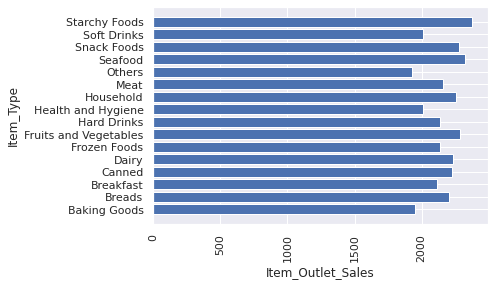

In [ ]:
plt.barh(IT.index, IT.values)
plt.ylabel('Item_Type')
plt.xlabel('Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
df.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
OutletSiSa = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
OutletSiSa

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

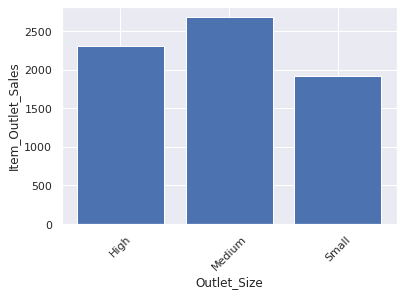

In [ ]:
plt.bar(OutletSiSa.index, OutletSiSa.values)
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_Size')
plt.xticks(rotation = 45)
plt.show()

Graph shows item outlet sales based on outlet size.


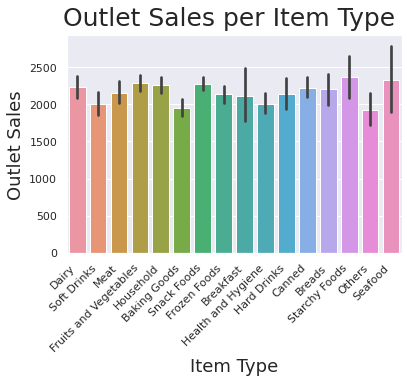

In [ ]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data = df)
sns.set(rc={'figure.figsize':(20,5)})
plt.ylabel('Outlet Sales', fontsize=18)
plt.xlabel('Item Type', fontsize=18)
plt.suptitle('Outlet Sales per Item Type', fontsize=25)
plt.xticks(rotation=45,ha='right');



Graph indicating the outlet sales by item type.

In [ ]:
# sales based on location
Loctype = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
Loctype

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

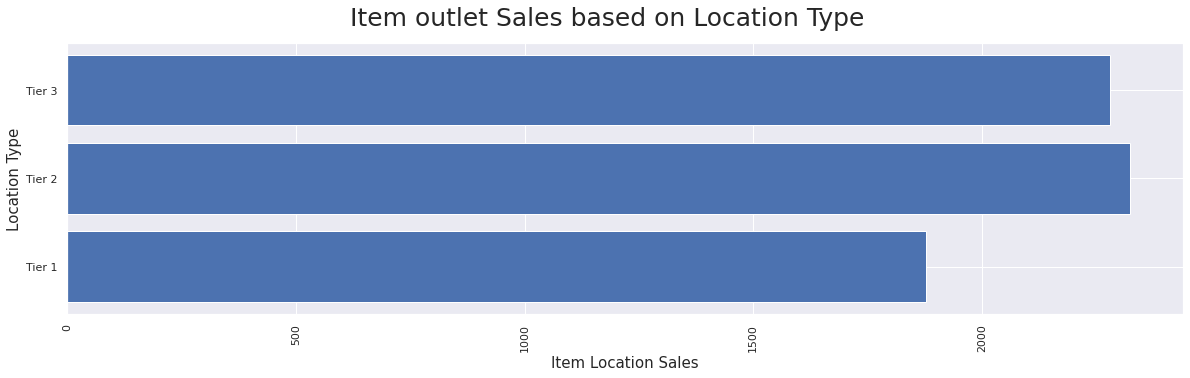

In [ ]:
plt.barh(Loctype.index, Loctype.values)
plt.ylabel('Location Type', fontsize=15)
plt.xlabel('Item Location Sales', fontsize=15)
plt.xticks(rotation = 90)
plt.suptitle('Item outlet Sales based on Location Type', fontsize=25)
plt.show()

Project 1 Part 5

In [ ]:
X = df.drop(columns = ['Item_Outlet_Sales', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# column selectors
numerical_selector = make_column_selector(dtype_include='number')
categorical_selector = make_column_selector(dtype_include='object')

In [ ]:
# Scaler, Imputer, OHE
scaler = StandardScaler()
# OHE
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Imputer
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
numerical_pipeline = make_pipeline(mean_imputer, scaler)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipeline=make_pipeline(freq_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for ColumnTransformer
numerical_tuple = (numerical_pipeline, numerical_selector)
categorical_tuple = (categorical_pipeline, categorical_selector)

In [ ]:
column_transformer = (make_column_transformer(numerical_tuple, categorical_tuple, remainder='passthrough'))
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9ada3a35d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9ada3a3950>)])

In [ ]:
# fit
column_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9ada3a35d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9ada3a3950>)])

In [ ]:
# transform train and test
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train processed are', X_train_processed.dtype)
print('All data in X_test processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train processed are float64
All data in X_test processed are float64


shape of data is (6392, 32)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# X_train_df = pd.DataFrame(X_train_processed)
# X_train_df.head()

**LINEAR REGRESSION MODEL**

In [ ]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
#print (f'r2 score: {r2} mae score: {mae} mse score : {mse} The rmse score: {rmse}')
def eval_model (true, pred):
  r2 = r2_score(true, pred)
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  print(f' r2: {r2:,.2f},\n mae: {mae:,.2f}, \n mse: {mse:,.2f} \n rmse:{rmse:,.2f}\n')


In [ ]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

In [ ]:
print('Train Evaluation Metric')
Train_evaluation = eval_model(y_train, train_preds)


Train Evaluation Metric
 r2: 0.56,
 mae: 847.18, 
 mse: 1,298,631.86 
 rmse:1,139.58



In [ ]:
print('Test Evaluation Metric')
Test_evaluation = eval_model(y_test, test_preds)

Test Evaluation Metric
 r2: 0.57,
 mae: 803.98, 
 mse: 1,194,496.09 
 rmse:1,092.93



In [ ]:
# DECISION TREE

In [ ]:
max_depth_range = list(range(2, 15))
r2 = []
for depth in max_depth_range: 
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state=42)
  dec_tree.fit(X_train_processed, y_train)
  score = dec_tree.score(X_test_processed, y_test)
  r2.append(score)

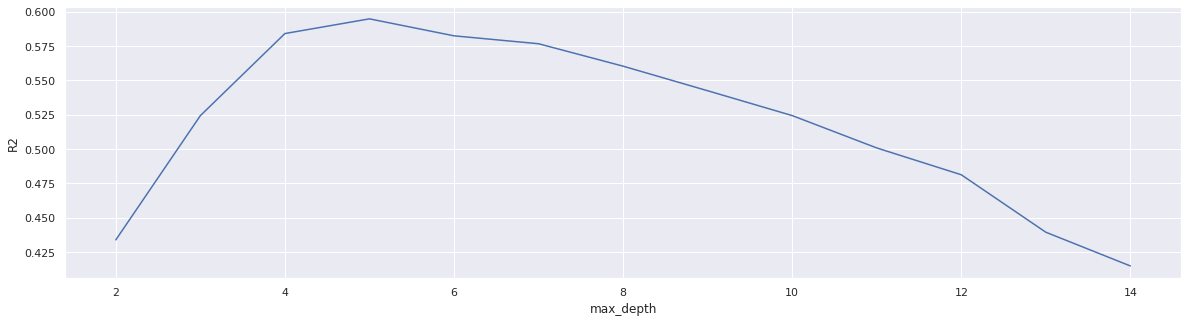

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel("max_depth")
plt.ylabel("R2");

In [ ]:
# graph shows that the max_depth of 5 will yeild the highest r2 value.

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth =5, random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Instantiating prediction

In [ ]:
dec_train_preds = dec_tree.predict(X_train_processed)
dec_test_preds = dec_tree.predict(X_test_processed)

In [ ]:
print('Train Evaluation Metric')
Train_evaluation = eval_model(y_train, dec_train_preds)


Train Evaluation Metric
 r2: 0.60,
 mae: 762.61, 
 mse: 1,172,122.77 
 rmse:1,082.65



In [ ]:
print('Test Evaluation Metric')
Test_evaluation = eval_model(y_test, dec_test_preds)

Test Evaluation Metric
 r2: 0.59,
 mae: 738.32, 
 mse: 1,118,185.97 
 rmse:1,057.44



In [ ]:
# BAGGED TREES

In [ ]:
bagreg = BaggingRegressor(random_state=42)


In [ ]:
bagreg.fit(X_train_processed, y_train)
r2_train = r2_score(y_train,train_preds)
r2_test = r2_score(y_test,test_preds)

In [ ]:
bagreg_train_preds = bagreg.predict(X_train_processed)
bagreg_test_preds = bagreg.predict(X_test_processed)

In [ ]:
print('Train Evaluation Metric')
Train_evaluation = eval_model(y_train,bagreg_train_preds)


Train Evaluation Metric
 r2: 0.92,
 mae: 321.38, 
 mse: 243,322.81 
 rmse:493.28



In [ ]:
print('Test Evaluation Metric')
Test_evaluation = eval_model(y_test,bagreg_test_preds)

Test Evaluation Metric
 r2: 0.53,
 mae: 784.24, 
 mse: 1,299,723.08 
 rmse:1,140.05



In [ ]:
# RANDOM FOREST

In [ ]:
#Tuning the parameters for optimal results.

In [ ]:
max_depth_range =list(range(1,15))
r2=[]
for depth in max_depth_range:
  Rf_tree =RandomForestRegressor(max_depth=depth, random_state = 42)
  Rf_tree.fit(X_train_processed, y_train)
  score =Rf_tree.score(X_test_processed, y_test)
  r2.append(score)

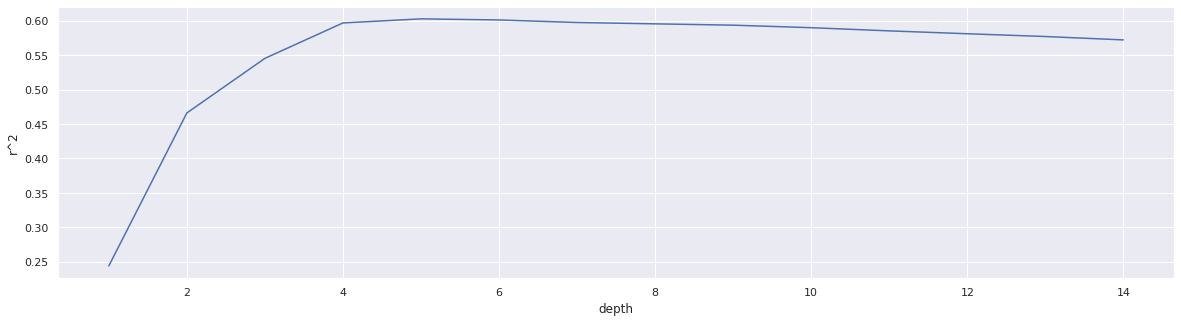

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel('depth')
plt.ylabel("r^2");

In [ ]:
n_estimators_range =list(range(50,100))
r3 =[]
for estimator in n_estimators_range:
  Rf_tree =RandomForestRegressor(n_estimators = estimator, random_state = 42)
  Rf_tree.fit(X_train_processed, y_train)
  score =Rf_tree.score(X_test_processed, y_test)
  r3.append(score)

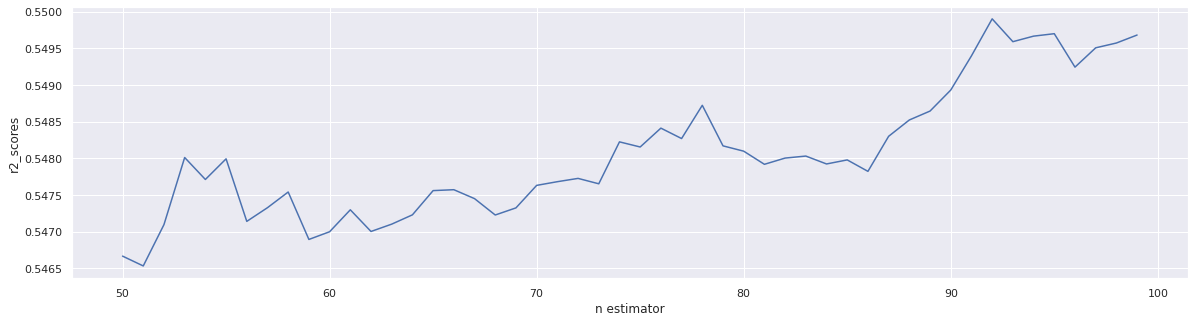

In [ ]:
#The graph below shows 92, as the optimal value of n_estimators.
plt.plot(n_estimators_range, r3)
plt.xlabel('n estimator')
plt.ylabel('r2_scores');

In [ ]:
rf = RandomForestRegressor(max_depth=9,n_estimators=92 ,random_state = 42)

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=9, n_estimators=92, random_state=42)

In [ ]:
#Prediction of independent features(X)
rf_train_preds =rf.predict(X_train_processed)
rf_test_preds = rf.predict(X_test_processed)

In [ ]:
print('Train Evaluation Metric')
Train_evaluation = eval_model(y_train,rf_train_preds)


Train Evaluation Metric
 r2: 0.69,
 mae: 675.10, 
 mse: 911,266.83 
 rmse:954.60



In [ ]:
print('Test Evaluation Metric')
Test_evaluation = eval_model(y_test,rf_test_preds)

Test Evaluation Metric
 r2: 0.59,
 mae: 735.44, 
 mse: 1,121,309.84 
 rmse:1,058.92

